In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize


In [2]:
X_bg = np.load('bckgrnd_hist.npy')
X_sig = np.load('sig_hist.npy')
X_bg =  X_bg.reshape(len(X_bg), 100)
X_sig = X_sig.reshape(len(X_sig), 100)


In [3]:
bg_mean =  np.mean(X_bg, axis = 0)
sig_mean = np.mean(X_sig, axis = 0)

In [4]:
X_bg = X_bg - bg_mean
X_sig = X_sig - sig_mean

In [5]:
X_bg = normalize(X_bg, axis = 0, norm = 'max')

In [6]:
X_sig = normalize(X_sig, axis = 0, norm = 'max')

In [7]:
pca = PCA(n_components=2)
pca.fit(X_sig)

PCA(n_components=2)

In [8]:

W_sig = pca.components_
pca.fit(X_bg)
W_bg = pca.components_

proj_sig = X_sig@W_sig.T
proj_bg = X_bg@W_bg.T

Text(0, 0.5, 'PC2')

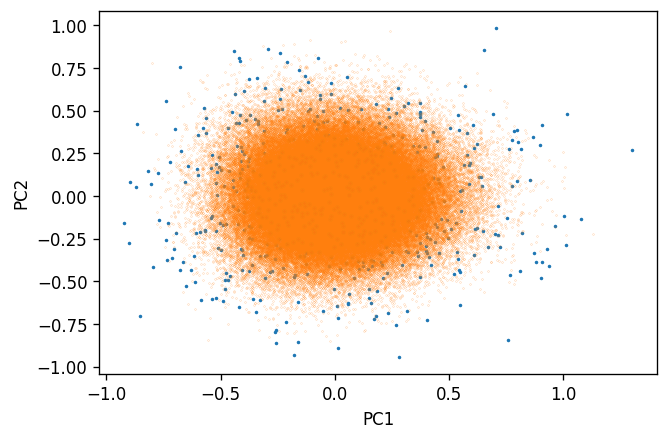

In [9]:
plt.figure(dpi = 120)
plt.scatter(proj_sig[:,0], proj_sig[:,1], s = 1.2)
plt.scatter(proj_bg[:,0], proj_bg[:,1], s= 0.01)
plt.xlabel("PC1")
plt.ylabel("PC2")

# Radius Comparison

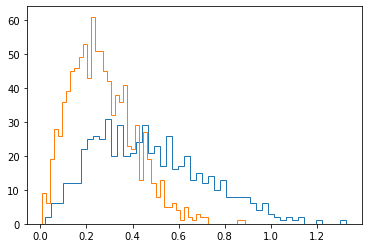

In [11]:
radius_sig = np.sqrt(proj_sig[:,0]**2 + proj_sig[:,1]**2)
radius_bg = np.sqrt(proj_bg[:1000,0]**2 + proj_bg[:1000,1]**2)

c = plt.hist(radius_sig, bins = 50,  histtype= 'step')
d = plt.hist(radius_bg, bins = 50,  histtype= 'step')

In [12]:
pca80 = PCA(n_components=80)
pca80.fit(X_sig)
W_sig80 = pca80.components_
pca.fit(X_bg)
W_bg80 = pca80.components_

proj_sig80 = X_sig@W_sig80.T
proj_bg80 = X_bg@W_bg80.T


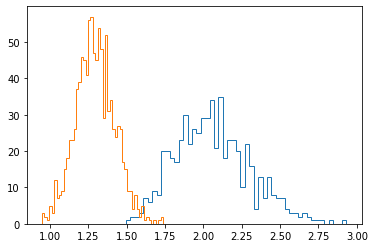

In [14]:
radius_sig = np.sqrt(np.sum(proj_sig80**2, axis = 1))
radius_bg = np.sqrt(np.sum(proj_bg80[0:1000]**2, axis = 1))

a = plt.hist(radius_sig, bins = 50, histtype= 'step')
b = plt.hist(radius_bg, bins = 50, histtype='step')

# Reconstruction

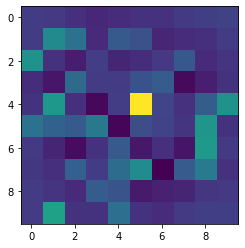

In [15]:
plt.imshow(X_sig[200].reshape(10,10))

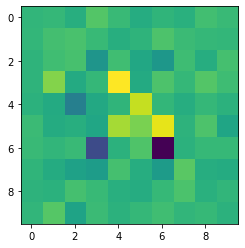

In [19]:
plt.imshow((proj_sig[200]@W_sig).reshape(10,10))

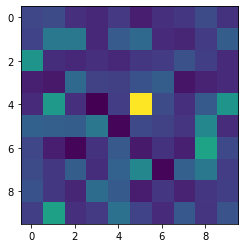

In [21]:
plt.imshow((proj_sig80[200]@W_sig80).reshape(10,10))

# Reconstrution error

In [49]:
bg_recon2 = proj_bg@W_bg
sig_recon2 = proj_sig@W_bg

In [58]:
bg_rc2_err = np.sqrt(np.sum((bg_recon2[0:5000] - X_bg[0:5000])**2, axis = 1))#/len(X_bg)
sig_rc2_err = np.sqrt(np.sum((sig_recon2 - X_sig)**2, axis = 1))#/len(X_sig)

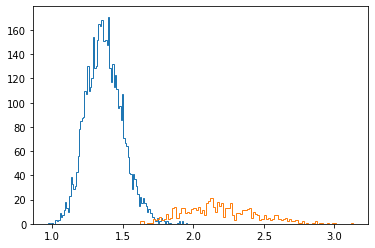

In [59]:
a = plt.hist(bg_rc2_err, bins = 100,histtype='step')
b = plt.hist(sig_rc2_err, bins = 100,histtype='step')

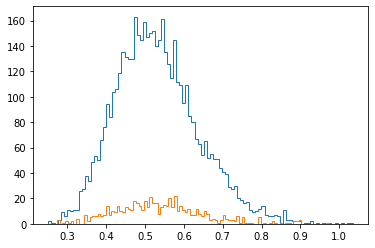

In [60]:
bg_recon80 = proj_bg80@W_bg80
sig_recon80 = proj_sig80@W_bg80

bg_rc80_err = np.sqrt(np.sum((bg_recon80[0:5000] - X_bg[0:5000])**2, axis = 1))#/len(X_bg)
sig_rc80_err = np.sqrt(np.sum((sig_recon80 - X_sig)**2, axis = 1))#/len(X_sig)

a = plt.hist(bg_rc80_err, bins = 100,histtype='step')
b = plt.hist(sig_rc80_err, bins = 100,histtype='step')